Лабораторная работа № 6  Кластеризация (DBSCAN, OPTICS)

Выполнил: Мартынов В.А., ДПИ15

1. Загрузка данных

In [6]:
# Загрузка данных

import pandas as pd

file_path = 'Pistachio_16_Features_Dataset.xlsx'

data = pd.read_excel(file_path, sheet_name='Pistachio_Dataset') 

data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,Siit_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,Siit_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,Siit_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,Siit_Pistachio


In [7]:
# Подготовка данных

print("Количество пустых значений в каждом столбце:")
print(data.isnull().sum())

data = data.drop(['Class'], axis=1) # Убираем обнаруженные метки классов

data

Количество пустых значений в каждом столбце:
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_features, columns=data.columns)

print("\nСтандартизированные данные:")
scaled_df


Стандартизированные данные:


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,-1.262296,0.379338,-1.723590,-0.051668,-0.925560,-1.257169,-1.459003,-0.901457,-1.459763,-1.038784,-1.153550,0.330588,0.610410,2.010131,0.300945,-1.579031
1,-0.883675,1.374821,-1.090999,-0.117456,-0.400406,-0.851241,-1.260749,-0.534133,-0.740038,-0.616362,-1.605338,0.112790,0.365630,1.126973,0.080381,-1.019493
2,-0.484931,-0.477881,0.188485,-0.585974,0.674518,-0.439385,-0.453857,-0.363587,-0.064106,0.636739,0.121894,-0.816778,0.488020,-0.050572,-0.822209,-0.311387
3,-0.674203,0.051373,-0.515445,-0.733752,0.493996,-0.632989,0.372861,-0.825955,-0.252605,0.373871,-0.664622,-0.282389,0.365630,-0.050572,-0.309125,0.390931
4,0.010393,-0.464602,0.713037,-0.573444,0.863245,0.052342,0.507673,-0.158673,0.568033,0.942933,0.344732,-0.735946,0.243241,-0.639344,-0.745559,0.541427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,0.459829,-0.716036,-0.058705,0.348171,-0.242450,0.481513,0.836774,0.191620,-0.688629,-0.469306,1.118085,0.707804,-0.613487,-0.344958,0.688887,0.670700
2144,0.437570,2.400604,-0.196363,1.340362,-1.374813,0.460612,-1.020862,0.868559,-1.086572,-1.337896,-1.741204,0.849261,-0.735876,0.832586,0.835930,-1.274179
2145,1.614899,-0.453696,0.893007,1.089574,-0.394252,1.521308,0.965639,1.313135,0.806038,-0.611363,1.113854,0.943565,-1.225435,-0.933730,0.934479,0.838562
2146,1.330800,-0.614568,0.182914,1.196706,-0.937869,1.273221,0.993395,1.015838,0.903143,-1.047116,1.352677,1.475709,-1.347824,-0.639344,1.503878,0.842420


In [9]:
# Понижаем размерность, определяем дисперсию и выполняем кластеризацию k-means

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)

df_pca2 = pca2.fit_transform(scaled_df)

df_pca2 = pd.DataFrame(df_pca2)

df_pca2

,0,1
0,1.917767,-3.955378
1,1.425406,-3.100488
2,1.706975,0.555703
3,1.566536,0.280270
4,0.800452,2.009091
...,...,...
2143,-1.538567,0.753793
2144,-1.860704,-4.051804
2145,-3.825358,1.455896
2146,-4.091008,0.909061


In [10]:
# Объясненная дисперсия
explained_variance = pca2.explained_variance_ratio_

print("Объясненная дисперсия для двух компонентов:", explained_variance)


total_explained_variance = explained_variance.sum()
print("Общая объясненная дисперсия:", total_explained_variance)

Объясненная дисперсия для двух компонентов: [0.4498096  0.30577581]
Общая объясненная дисперсия: 0.755585405982411


n_init=1, Inertia=11666.75
n_init=2, Inertia=11666.68
n_init=3, Inertia=11666.68
n_init=4, Inertia=11666.68
n_init=5, Inertia=11666.46
n_init=6, Inertia=11666.46
n_init=7, Inertia=11666.32
n_init=8, Inertia=11666.32
n_init=9, Inertia=11666.32
n_init=10, Inertia=11666.32
n_init=11, Inertia=11666.32
n_init=12, Inertia=11666.32
n_init=13, Inertia=11666.32
n_init=14, Inertia=11666.32
n_init=15, Inertia=11666.32
n_init=16, Inertia=11666.32
n_init=17, Inertia=11666.32
n_init=18, Inertia=11666.32
n_init=19, Inertia=11666.32
n_init=20, Inertia=11666.32


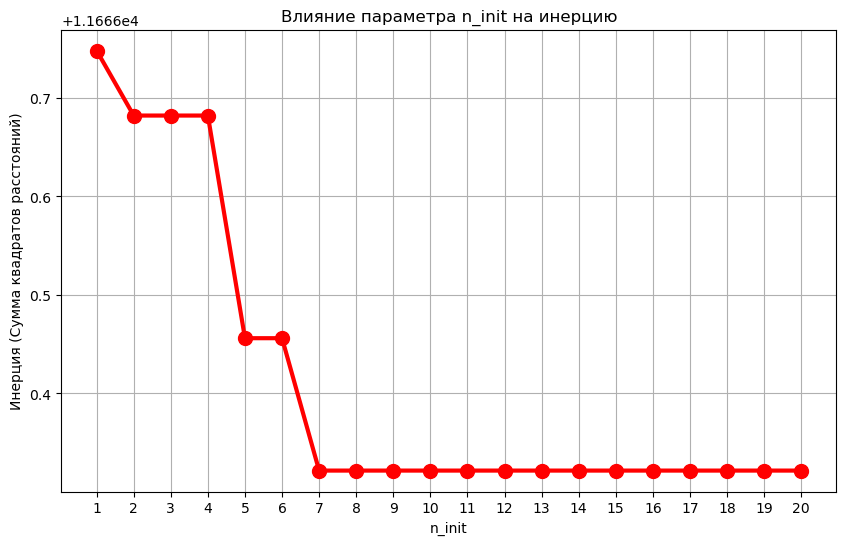

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


n_init_values = range(1, 21)
inertia_values = []

for n_init in n_init_values:
    kmeans = KMeans(n_clusters=3, n_init=n_init, random_state=0)
    kmeans.fit_predict(df_pca2)
    inertia_values.append(kmeans.inertia_)
    print(f"n_init={n_init}, Inertia={kmeans.inertia_:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(n_init_values, inertia_values, marker='o', markersize=10, linewidth=3, color='red')
plt.title('Влияние параметра n_init на инерцию')
plt.xlabel('n_init')
plt.ylabel('Инерция (Сумма квадратов расстояний)')
plt.xticks(n_init_values)
plt.grid(True)
plt.show()

# По полученному графику делаем вывод, что оптимальным значением параметра будет n_init=7

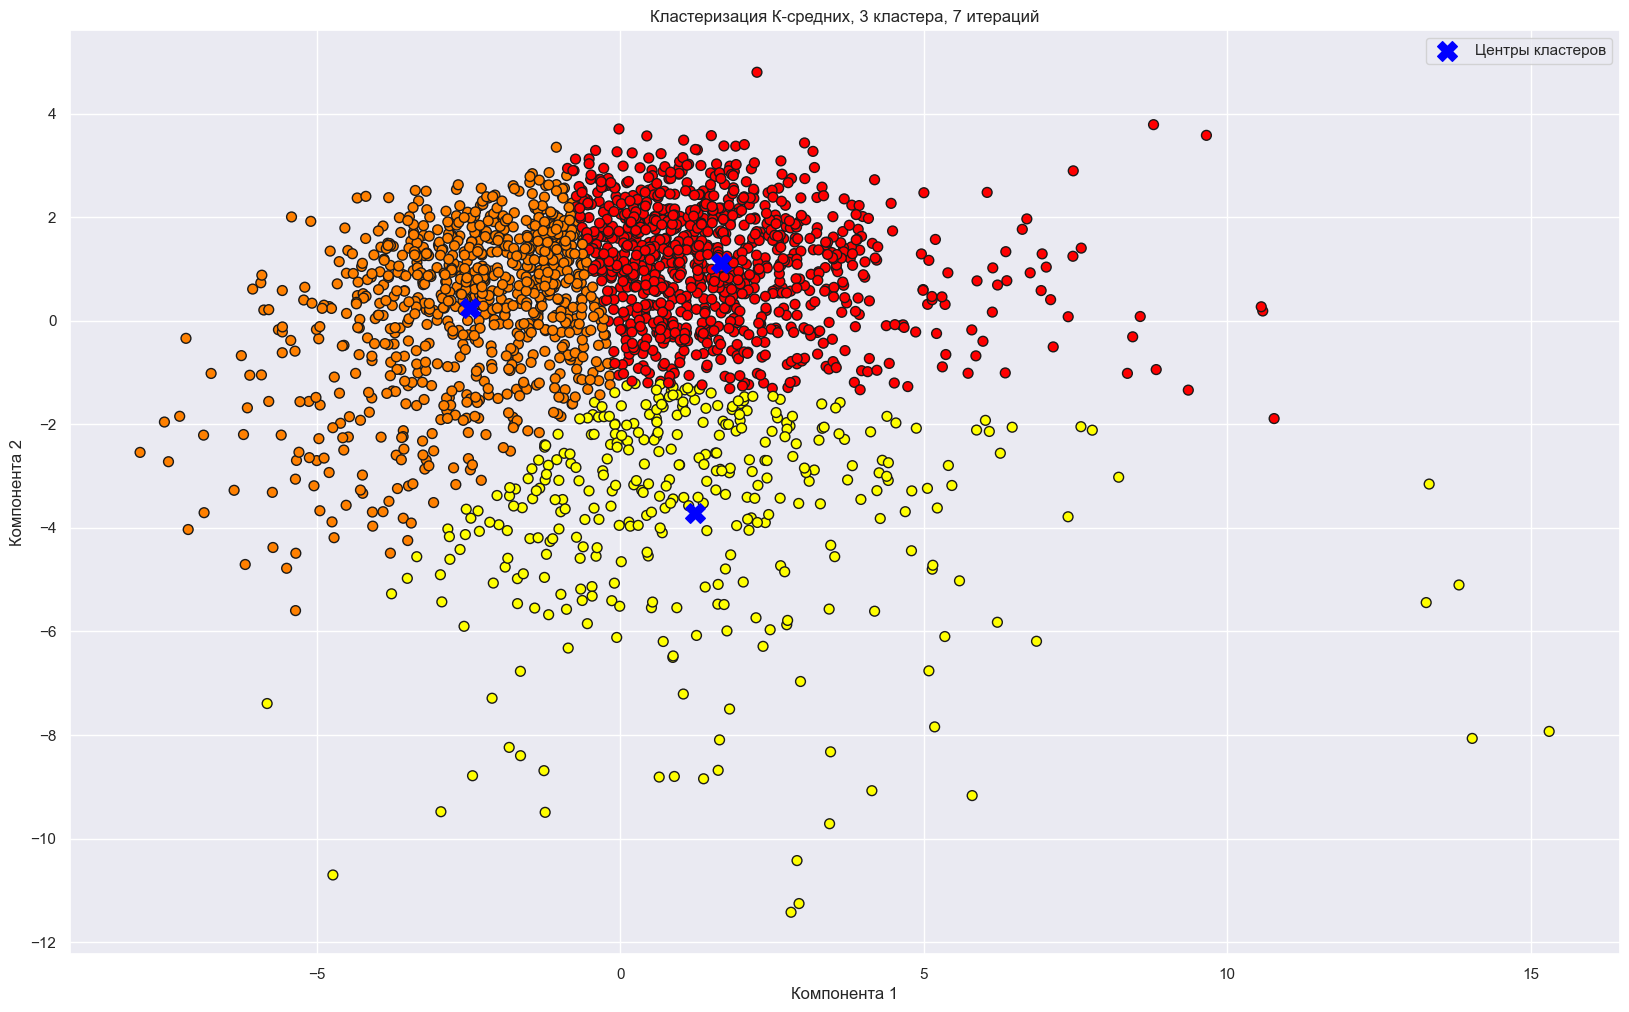

In [12]:
import seaborn as sns

sns.set(style="darkgrid")

kmeans = KMeans(n_clusters=3, n_init=7, random_state=42)
kmeans.fit(df_pca2)

labels = kmeans.labels_

plt.figure(figsize=(20, 12))
plt.scatter(df_pca2.iloc[:, 0], df_pca2.iloc[:, 1], c=labels, cmap='autumn', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  color='Blue', marker='X', s=200, label='Центры кластеров')
plt.title('Кластеризация К-средних, 3 кластера, 7 итераций')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend()
plt.show()


2. DBSCAN

C:\Users\v-mar\AppData\Local\Temp\ipykernel_5952\34608902.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('autumn', len(unique_labels))


Количество кластеров: 17
Процент наблюдений, которые кластеризовать не удалось: 90.18%


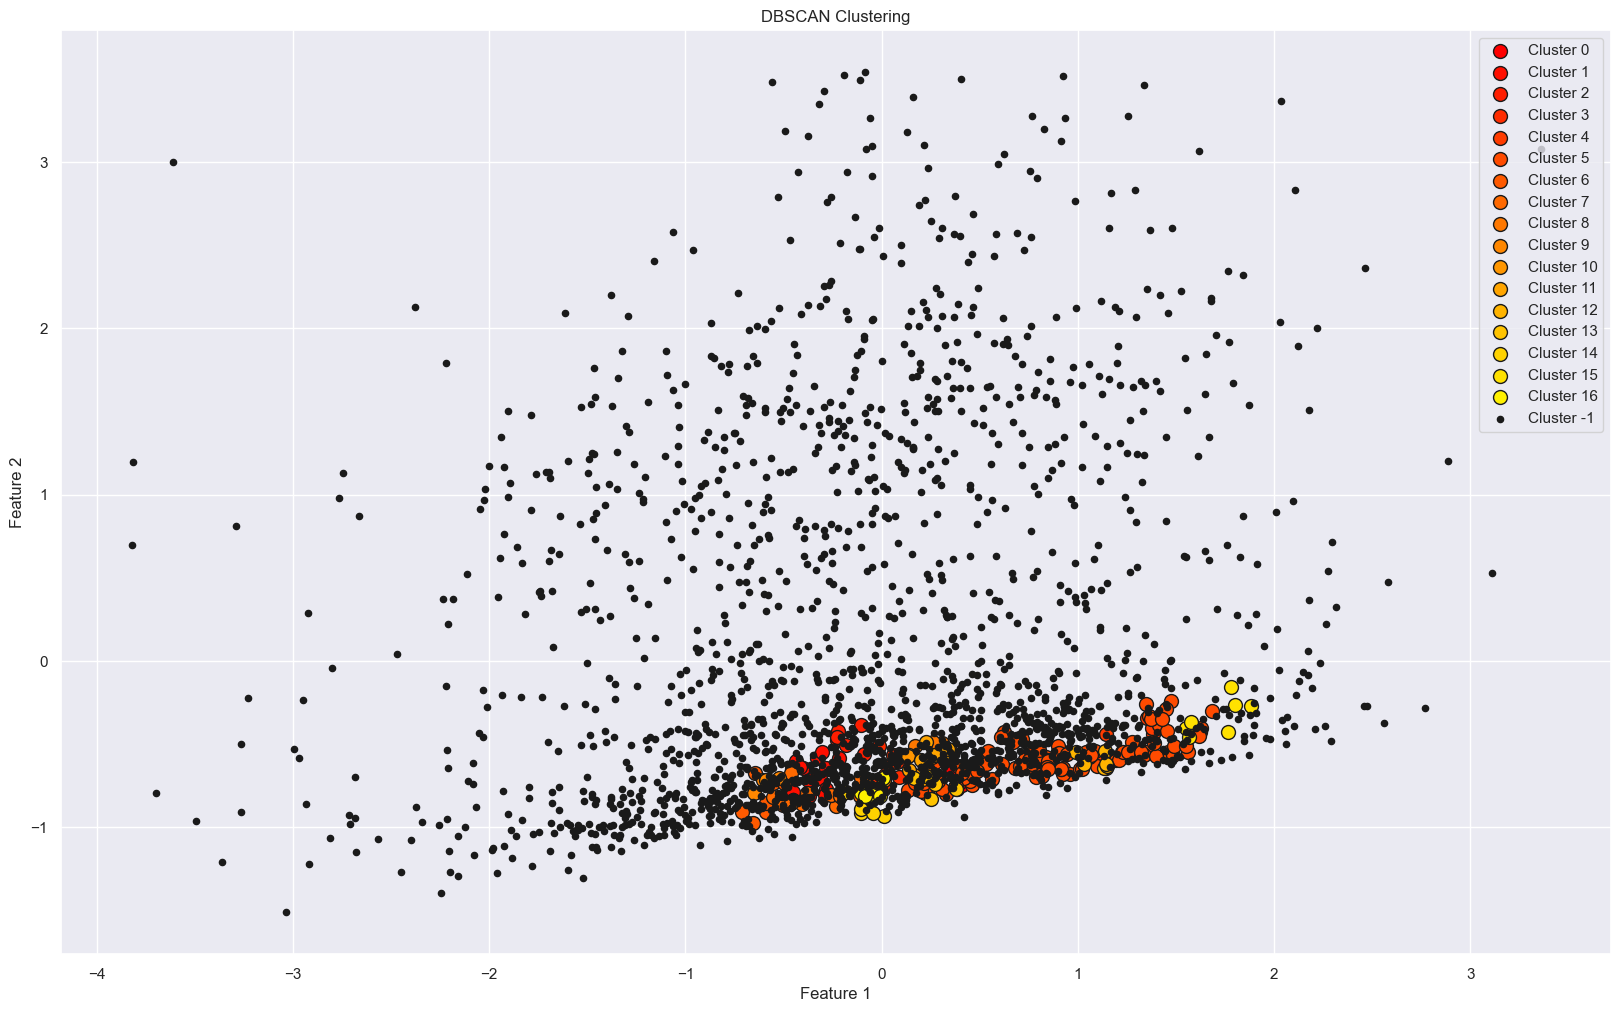

In [13]:
from sklearn.cluster import DBSCAN

# В этом задании используем стандартизированные данные.
# DBSCAN использует расстояния между точками для определения кластеров. Исходный датасет имеет разный масштаб среди данных, это может повлиять на результаты кластеризации.

sns.set(style="darkgrid")

# Кластеризация DBSCAN
dbscan = DBSCAN()  # Настройте eps и min_samples по необходимости
labels = dbscan.fit_predict(scaled_df)

# Получение количества кластеров и количества шумовых точек
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 - это шум
n_noise = list(labels).count(-1)

# Процент наблюдений, которые не удалось кластеризовать
percentage_noise = n_noise / len(labels) * 100

# Визуализация кластеров
plt.figure(figsize=(20, 12))  # Настройка размера графика
unique_labels = set(labels)

# Цвета для кластеров
colors = plt.cm.get_cmap('autumn', len(unique_labels))

for label in unique_labels:
    if label == -1:
        # Черный цвет для шумовых точек
        color = 'k'
        size = 20  # Размер для шумовых точек
    else:
        color = colors(label)
        size = 100  # Размер для кластерных точек
    
    # Выбор точек для текущего кластера
    cluster_points = scaled_df[labels == label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color=color, label=f'Cluster {label}', edgecolor='k', s=size)

print(f"Количество кластеров: {n_clusters}")
print(f"Процент наблюдений, которые кластеризовать не удалось: {percentage_noise:.2f}%")

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [14]:
# Параметры метода DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
# 
#       eps (float, по умолчанию=0.5): Это максимальное расстояние между двумя образцами для того, чтобы они считались в одном кластере. 
#       Если расстояние между двумя точками меньше или равно eps, они считаются соседями. 
#       Этот параметр определяет "размер" кластера.
#
#       min_samples (int, по умолчанию=5): Минимальное количество образцов (точек) в окрестности точки, чтобы она могла быть считаться "ядром" кластера. 
#       Если в окрестности точки (в пределах eps) находится не менее min_samples точек, то эта точка считается "ядром" кластера. 
#       Если точка не является ядром, но находится в пределах eps от ядра, она считается "пограничной". 
#       Если точка не попадает ни в одну из этих категорий, она считается шумом.
#
#       metric (str или callable, по умолчанию='euclidean'): Метрика, используемая для вычисления расстояний между точками. 
#       По умолчанию используется евклидово расстояние, но можно использовать и другие метрики, такие как манхэттенское расстояние, косинусное расстояние и т.д.
#
#       algorithm (str, по умолчанию='auto'): Алгоритм, используемый для вычисления ближайших соседей. 
#       Возможные значения:
#                           'auto': выбирает подходящий алгоритм на основе входных данных.
#                           'ball_tree': использует структуру данных Ball Tree.
#                           'kd_tree': использует структуру данных KD Tree.
#                           'brute': использует брутфорс для поиска ближайших соседей.
#
#       leaf_size (int, по умолчанию=30): Параметр, который влияет на производительность алгоритмов ball_tree и kd_tree. 
#       Он определяет размер листа в этих структурах данных. Меньшие значения могут привести к более точным результатам, но увеличивают время вычисления.
#
#       p (float, по умолчанию=2): Параметр, используемый для вычисления расстояния в метрике. 
#       Например, p=2 соответствует евклидовой метрике, а p=1 соответствует манхэттенской метрике.
#
#       n_jobs (int или None, по умолчанию=None): Количество потоков, используемых для вычислений. 
#       Если установлено в -1, используется все доступные процессоры. Это может ускорить процесс кластеризации на больших наборах данных.

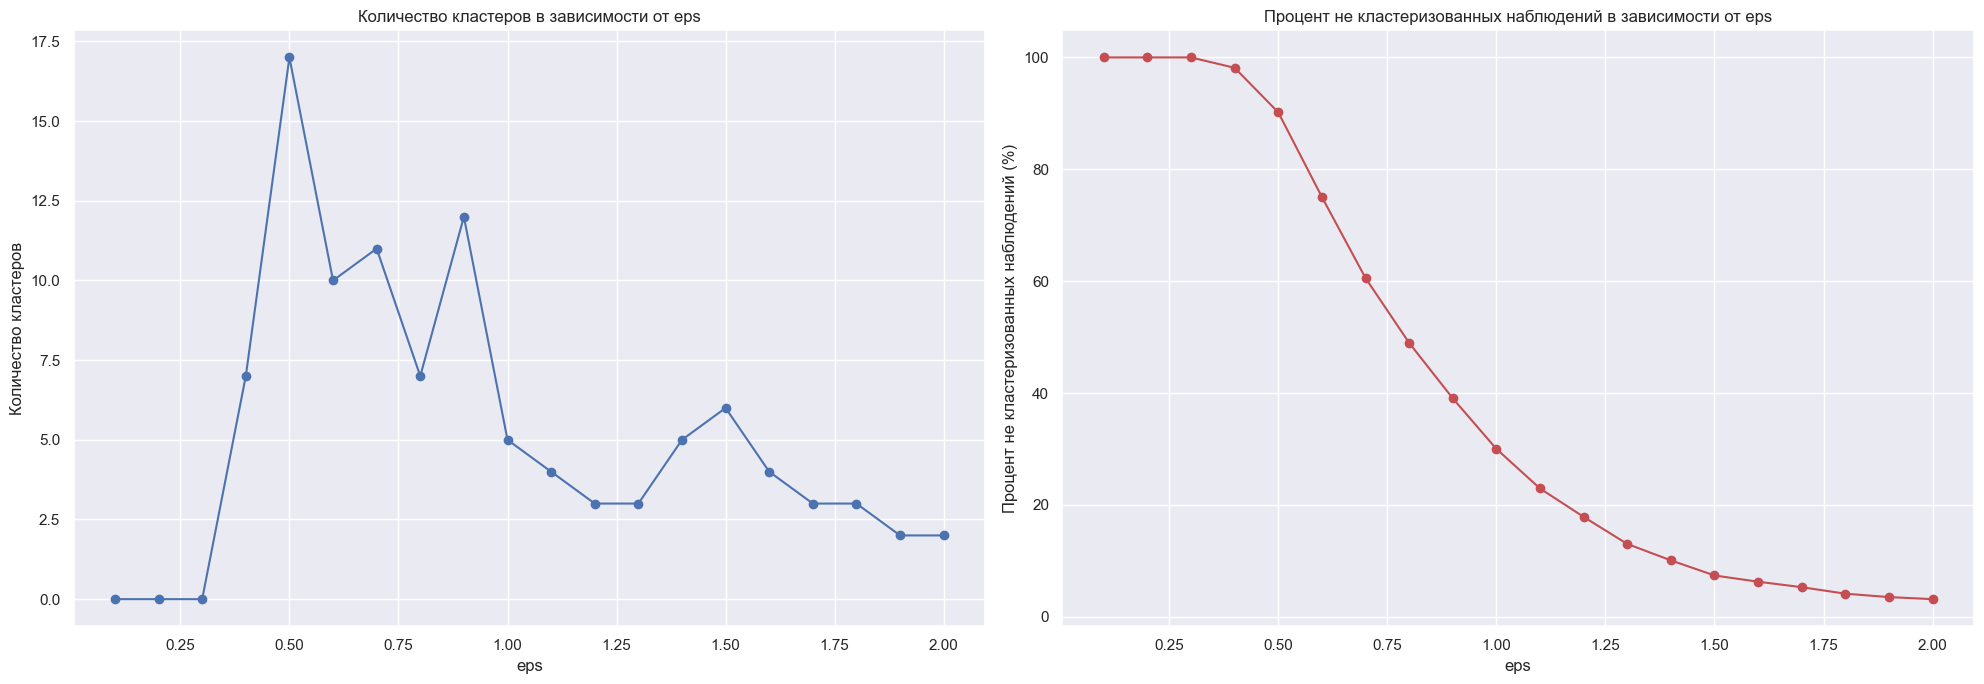

In [15]:
# Определение диапазона значений для eps
eps_values = np.arange(0.1, 2.1, 0.1)
n_clusters_list = []
percentage_noise_list = []

for eps in eps_values:
    # Кластеризация DBSCAN
    dbscan = DBSCAN(eps=eps)  # Установка eps
    labels = dbscan.fit_predict(scaled_df)

    # Получение количества кластеров и количества шумовых точек
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 - это шум
    n_noise = list(labels).count(-1)

    # Процент наблюдений, которые не удалось кластеризовать
    percentage_noise = n_noise / len(labels) * 100

    # Сохранение результатов
    n_clusters_list.append(n_clusters)
    percentage_noise_list.append(percentage_noise)

# Визуализация результатов
plt.figure(figsize=(20, 7))

# График количества кластеров
plt.subplot(1, 2, 1)
plt.plot(eps_values, n_clusters_list, marker='o')
plt.title('Количество кластеров в зависимости от eps')
plt.xlabel('eps')
plt.ylabel('Количество кластеров')


# График процента не кластеризованных наблюдений
plt.subplot(1, 2, 2)
plt.plot(eps_values, percentage_noise_list, marker='o', color='r')
plt.title('Процент не кластеризованных наблюдений в зависимости от eps')
plt.xlabel('eps')
plt.ylabel('Процент не кластеризованных наблюдений (%)')


plt.tight_layout()
plt.show()

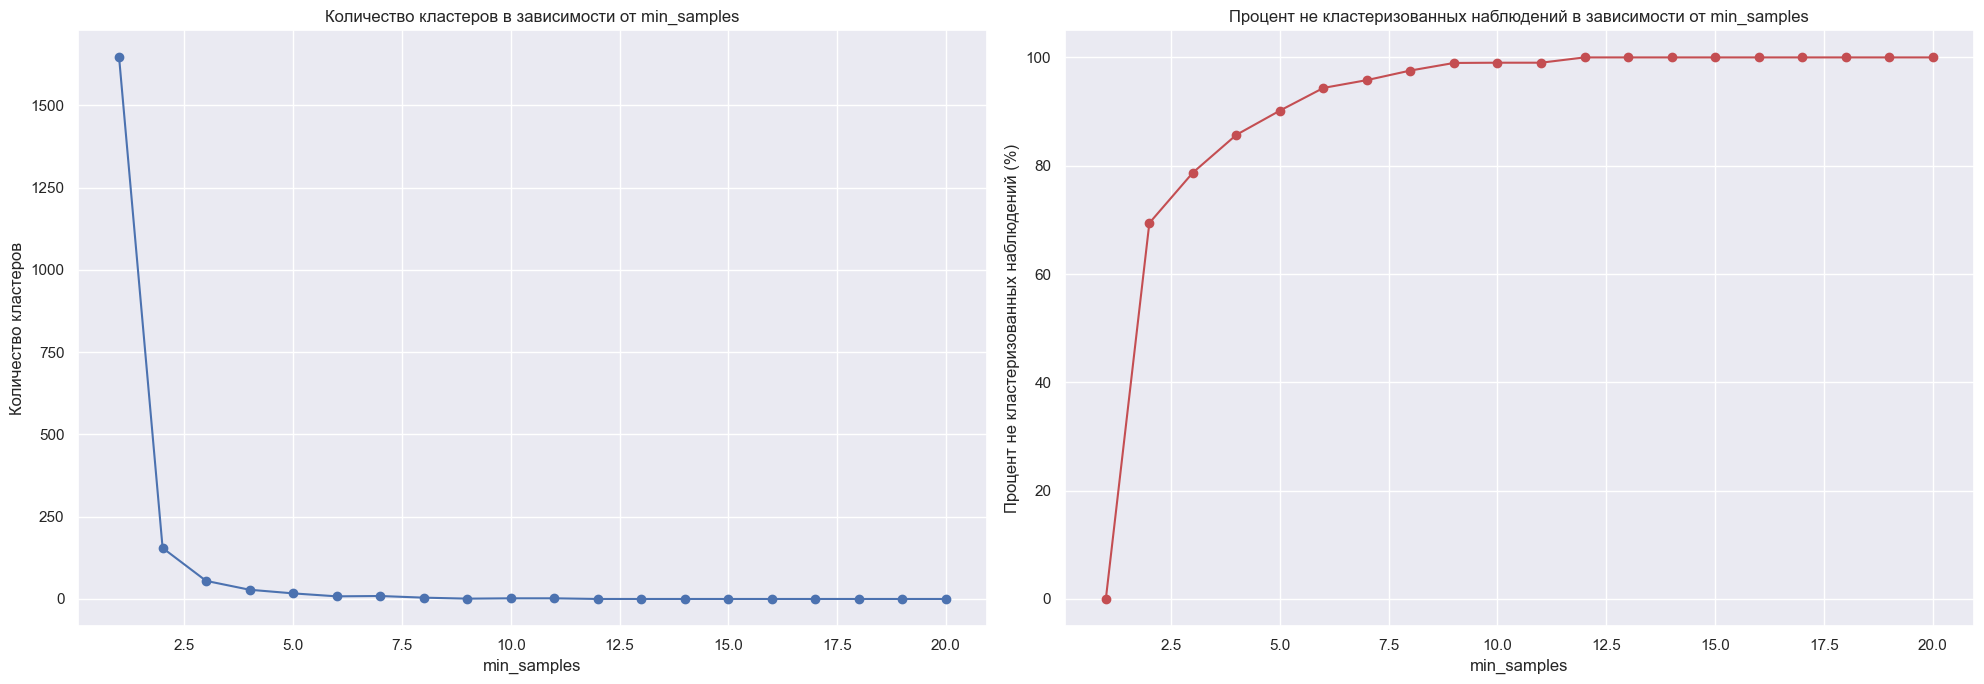

In [16]:
# Определение диапазона значений для min_samples
min_samples_values = range(1, 21) 
n_clusters_list = []
percentage_noise_list = []

for min_samples in min_samples_values:
    # Кластеризация DBSCAN
    dbscan = DBSCAN(min_samples=min_samples)  # Установка min_samples
    labels = dbscan.fit_predict(scaled_df)

    # Получение количества кластеров и количества шумовых точек
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 - это шум
    n_noise = list(labels).count(-1)

    # Процент наблюдений, которые не удалось кластеризовать
    percentage_noise = n_noise / len(labels) * 100

    # Сохранение результатов
    n_clusters_list.append(n_clusters)
    percentage_noise_list.append(percentage_noise)

# Визуализация результатов
plt.figure(figsize=(20, 7))

# График количества кластеров
plt.subplot(1, 2, 1)
plt.plot(min_samples_values, n_clusters_list, marker='o')
plt.title('Количество кластеров в зависимости от min_samples')
plt.xlabel('min_samples')
plt.ylabel('Количество кластеров')

# График процента не кластеризованных наблюдений
plt.subplot(1, 2, 2)
plt.plot(min_samples_values, percentage_noise_list, marker='o', color='r')
plt.title('Процент не кластеризованных наблюдений в зависимости от min_samples')
plt.xlabel('min_samples')
plt.ylabel('Процент не кластеризованных наблюдений (%)')

plt.tight_layout()
plt.show()


In [17]:
# Определение диапазонов значений для eps и min_samples
eps_values = np.arange(0.1, 2.1, 0.1)  # Измените диапазон и шаг по необходимости
min_samples_values = range(1, 21)  # Измените диапазон по необходимости

# Список для хранения подходящих комбинаций параметров
valid_params = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Кластеризация DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)

        # Получение количества кластеров и количества шумовых точек
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 - это шум
        n_noise = list(labels).count(-1)

        # Процент наблюдений, которые не удалось кластеризовать
        percentage_noise = n_noise / len(labels) * 100

        # Проверка условий
        if 5 <= n_clusters <= 7 and percentage_noise <= 12:
            valid_params.append((eps, min_samples, n_clusters, percentage_noise))

# Вывод подходящих комбинаций параметров
print("Подходящие комбинации параметров (eps, min_samples, количество кластеров, процент не кластеризованных):")

for eps, min_samples, n_clusters, percentage_noise in valid_params:
    print(f"Оптимально eps: {eps:.2f}\nОптимальное min_samples: {min_samples}\nКоличество кластеров: {n_clusters}\nПроцент шумов: {percentage_noise:.2f}%")
    print()

Подходящие комбинации параметров (eps, min_samples, количество кластеров, процент не кластеризованных):
Оптимально eps: 1.30
Оптимальное min_samples: 4
Количество кластеров: 7
Процент шумов: 11.41%

Оптимально eps: 1.40
Оптимальное min_samples: 4
Количество кластеров: 6
Процент шумов: 8.38%

Оптимально eps: 1.40
Оптимальное min_samples: 5
Количество кластеров: 5
Процент шумов: 10.10%

Оптимально eps: 1.50
Оптимальное min_samples: 3
Количество кластеров: 7
Процент шумов: 5.59%

Оптимально eps: 1.50
Оптимальное min_samples: 4
Количество кластеров: 6
Процент шумов: 6.66%

Оптимально eps: 1.50
Оптимальное min_samples: 5
Количество кластеров: 6
Процент шумов: 7.40%

Оптимально eps: 1.60
Оптимальное min_samples: 3
Количество кластеров: 5
Процент шумов: 4.75%



Количество кластеров: 6
Процент наблюдений, которые кластеризовать не удалось: 6.66%


C:\Users\v-mar\AppData\Local\Temp\ipykernel_5952\892049262.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_labels))


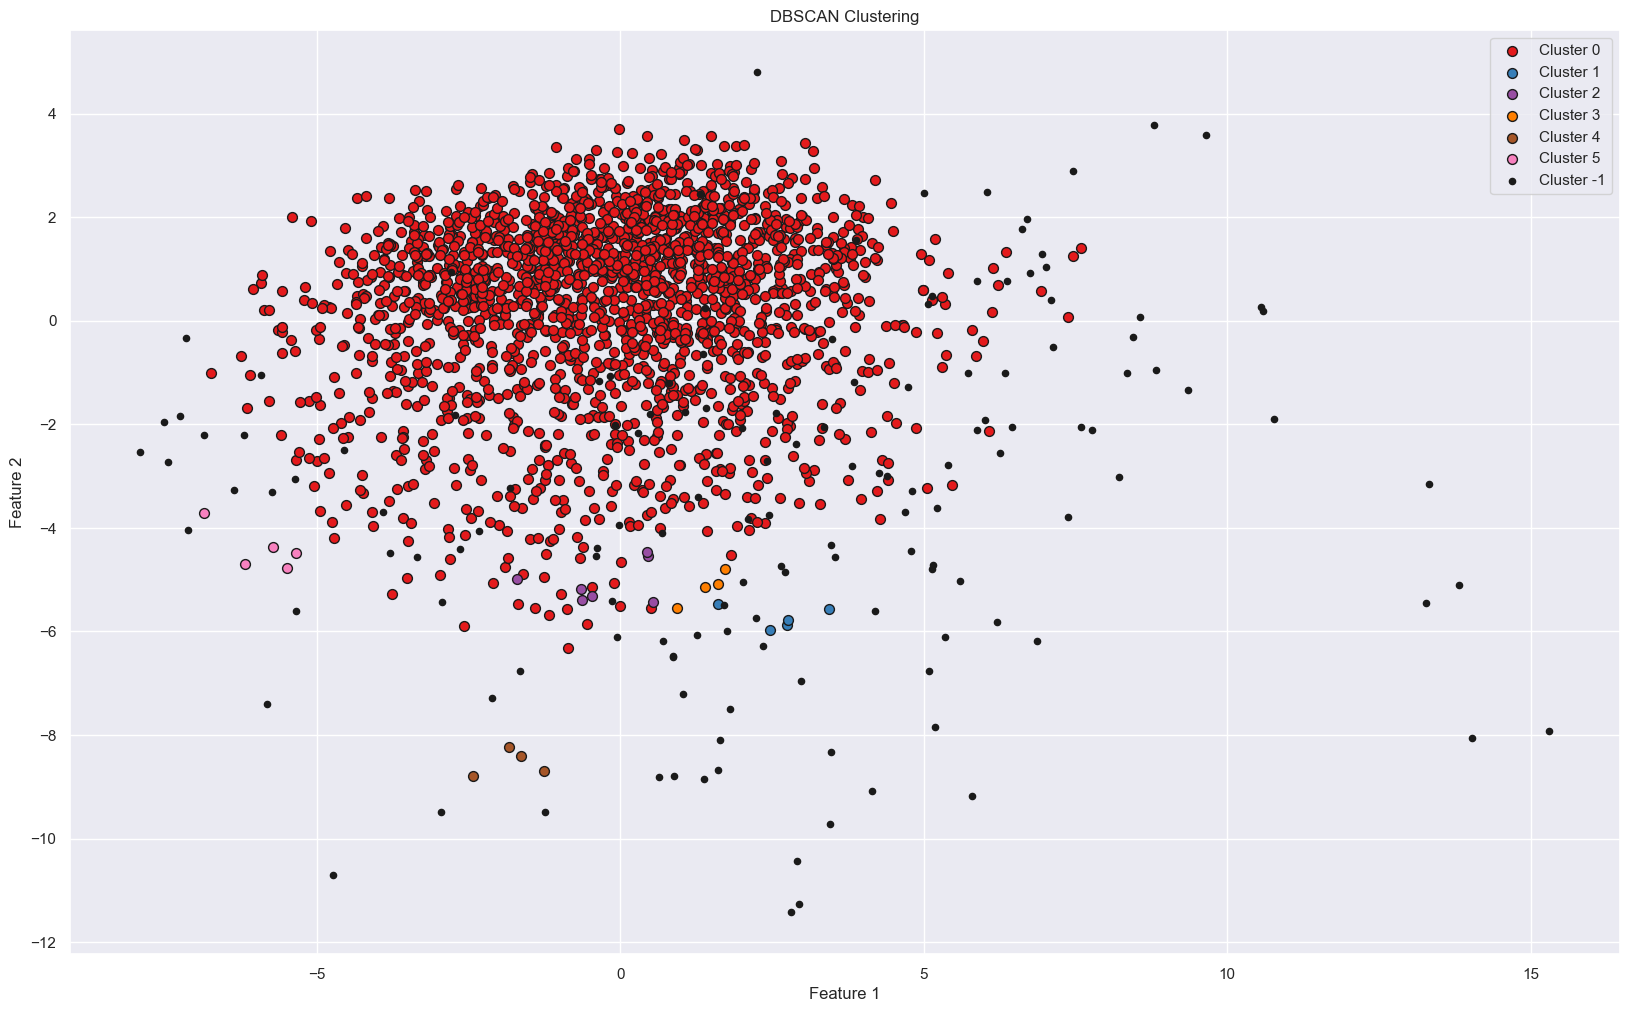

In [18]:
# Запишем оптимальные значения из предыдущего пункта, возьмем количество шумов наименьшее, а количество кластеров - 6
dbscan_eps = 1.5
dbscan_min_samples = 4 

# Кластеризация DBSCAN

dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
labels = dbscan.fit_predict(scaled_df) # Получаем метки на данных до уменьшенной размерности

# Получение количества кластеров и количества шумовых точек
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 - это шум
n_noise = list(labels).count(-1)

# Процент наблюдений, которые не удалось кластеризовать
percentage_noise = n_noise / len(labels) * 100

# Визуализация кластеров
plt.figure(figsize=(20, 12))  # Настройка размера графика
unique_labels = set(labels)

# Цвета для кластеров
colors = plt.cm.get_cmap('Set1', len(unique_labels))

for label in unique_labels:
    if label == -1:
        # Черный цвет для шумовых точек
        color = 'k'
        size = 20  # Размер для шумовых точек
    else:
        color = colors(label)
        size = 50  # Размер для кластерных точек
    
    # Выбор точек для текущего кластера
    cluster_points = df_pca2[labels == label] # На пониженной размерности
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color=color, label=f'Cluster {label}', edgecolor='k', s=size)

print(f"Количество кластеров: {n_clusters}")
print(f"Процент наблюдений, которые кластеризовать не удалось: {percentage_noise:.2f}%")

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

3.OPTICS

In [19]:
# OPTICS (Ordering Points To Identify the Clustering Structure) — это алгоритм кластеризации, который позволяет выявлять структуры кластеров в данных с различной плотностью. 
# Он является улучшением алгоритма DBSCAN и может обрабатывать данные, которые имеют сложные формы и разные плотности кластеров.
# 
# Параметры функции OPTICS:
#       X:
#           Нет значения по умолчанию (обязательный параметр).          
#           Тип: массив, матрица или DataFrame
#           Описание: Входные данные, которые необходимо кластеризовать. Это может быть двумерный массив, где строки представляют объекты, а столбцы — их признаки.
#       min_samples:
#           Значение по умолчанию: 5.
#           Тип: целое число
#           Описание: Минимальное количество точек в окрестности, необходимое для того, чтобы считать точку "ядром" кластера. Этот параметр влияет на чувствительность алгоритма к шуму.
#       max_eps:
#           Значение по умолчанию: None (не ограничивает максимальное расстояние).
#           Тип: число с плавающей запятой
#           Описание: Максимальное расстояние, в пределах которого будет производиться поиск соседей.
#       metric:
#           Тип: строка или функция
#           Описание: Метрика расстояния, используемая для вычисления расстояний между точками. По умолчанию используется "euclidean", но можно указать другие метрики, такие как "manhattan", "cosine" и т.д.
#       algorithm:
#           Значение по умолчанию: 'auto'.
#           Тип: строка
#           Описание: Алгоритм, используемый для вычисления ближайших соседей. Возможные значения: "auto", "ball_tree", "kd_tree", "brute".
#       leaf_size:
#           Значение по умолчанию: 30.
#           Тип: целое число
#           Описание: Параметр, который влияет на скорость вычисления ближайших соседей и использование памяти. Чем больше значение, тем меньше память, но медленнее вычисления.
#       p:
#           Тип: число с плавающей запятой
#           Описание: Параметр, используемый для метрики "minkowski". Если p=1, используется манхэттенское расстояние, если p=2 — евклидово (по умолчанию).
#       n_jobs:
#           Значение по умолчанию: None (используется один поток)
#           Тип: целое число или None
#           Описание: Количество потоков, используемых для вычислений. Если указано -1, используется все доступные потоки.
# Атрибуты:
# После выполнения алгоритма OPTICS, объект, возвращаемый функцией, будет иметь следующие атрибуты:
#       reachability_:
#           Описание: Массив, содержащий значения достижимости для каждой точки. Эти значения используются для построения графика достижимости.
#       ordering_:
#           Описание: Индексы точек в порядке их обработки. Это позволяет понять, в каком порядке были обработаны точки.
#       cluster_:
#           Описание: Массив, содержащий метки кластеров для каждой точки. Точки, которые не принадлежат ни одному кластеру, будут иметь метку -1 (шум).
#       core_distances_:
#           Описание: Массив, содержащий расстояния до ближайших соседей для "ядровых" точек.
#       n_clusters_:
#           Описание: Общее количество обнаруженных кластеров.

In [ ]:
import cupy as cp
import cudf
from cuML.cluster import OPTICS as cuOPTICS
import numpy as np

# Пример данных (замените на ваши данные)
# Предположим, что scaled_df - это ваш DataFrame, который нужно преобразовать в cuDF DataFrame
# scaled_df = ... (ваши данные)
# Преобразование в cuDF DataFrame
scaled_df_cudf = cudf.DataFrame.from_records(scaled_df)

# Определение диапазонов значений для eps и min_samples
eps_values = np.arange(0.1, 10.1, 0.1)  # Измените диапазон и шаг по необходимости
min_samples_values = range(2, 21)  # Измените диапазон по необходимости

# Список для хранения подходящих комбинаций параметров
valid_params = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Кластеризация OPTICS
        optics = cuOPTICS(max_eps=eps, min_samples=min_samples)
        labels = optics.fit_predict(scaled_df_cudf)

        # Получение количества кластеров и количества шумовых точек
        n_clusters = len(set(labels.to_array())) - (1 if -1 in labels.to_array() else 0)  # -1 - это шум
        n_noise = cp.asnumpy(cp.sum(labels.to_array() == -1))

        # Процент наблюдений, которые не удалось кластеризовать
        percentage_noise = n_noise / len(labels) * 100

        # Проверка условий
        if 5 <= n_clusters <= 7 and percentage_noise <= 12:
            valid_params.append((eps, min_samples, n_clusters, percentage_noise))

# Вывод подходящих комбинаций параметров
print("Подходящие комбинации параметров (eps, min_samples, количество кластеров, процент не кластеризованных):")

for eps, min_samples, n_clusters, percentage_noise in valid_params:
    print(f"Оптимально eps: {eps:.2f}\nОптимальное min_samples: {min_samples}\nКоличество кластеров: {n_clusters}\nПроцент шумов: {percentage_noise:.2f}%")
    print()


ModuleNotFoundError: No module named 'cudf'

C:\Users\v-mar\AppData\Local\Temp\ipykernel_20540\3282535086.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_labels_dbscan))


DBSCAN - Количество кластеров: 6, Процент не кластеризованных: 6.66%
OPTICS - Количество кластеров: 9, Процент не кластеризованных: 95.30%


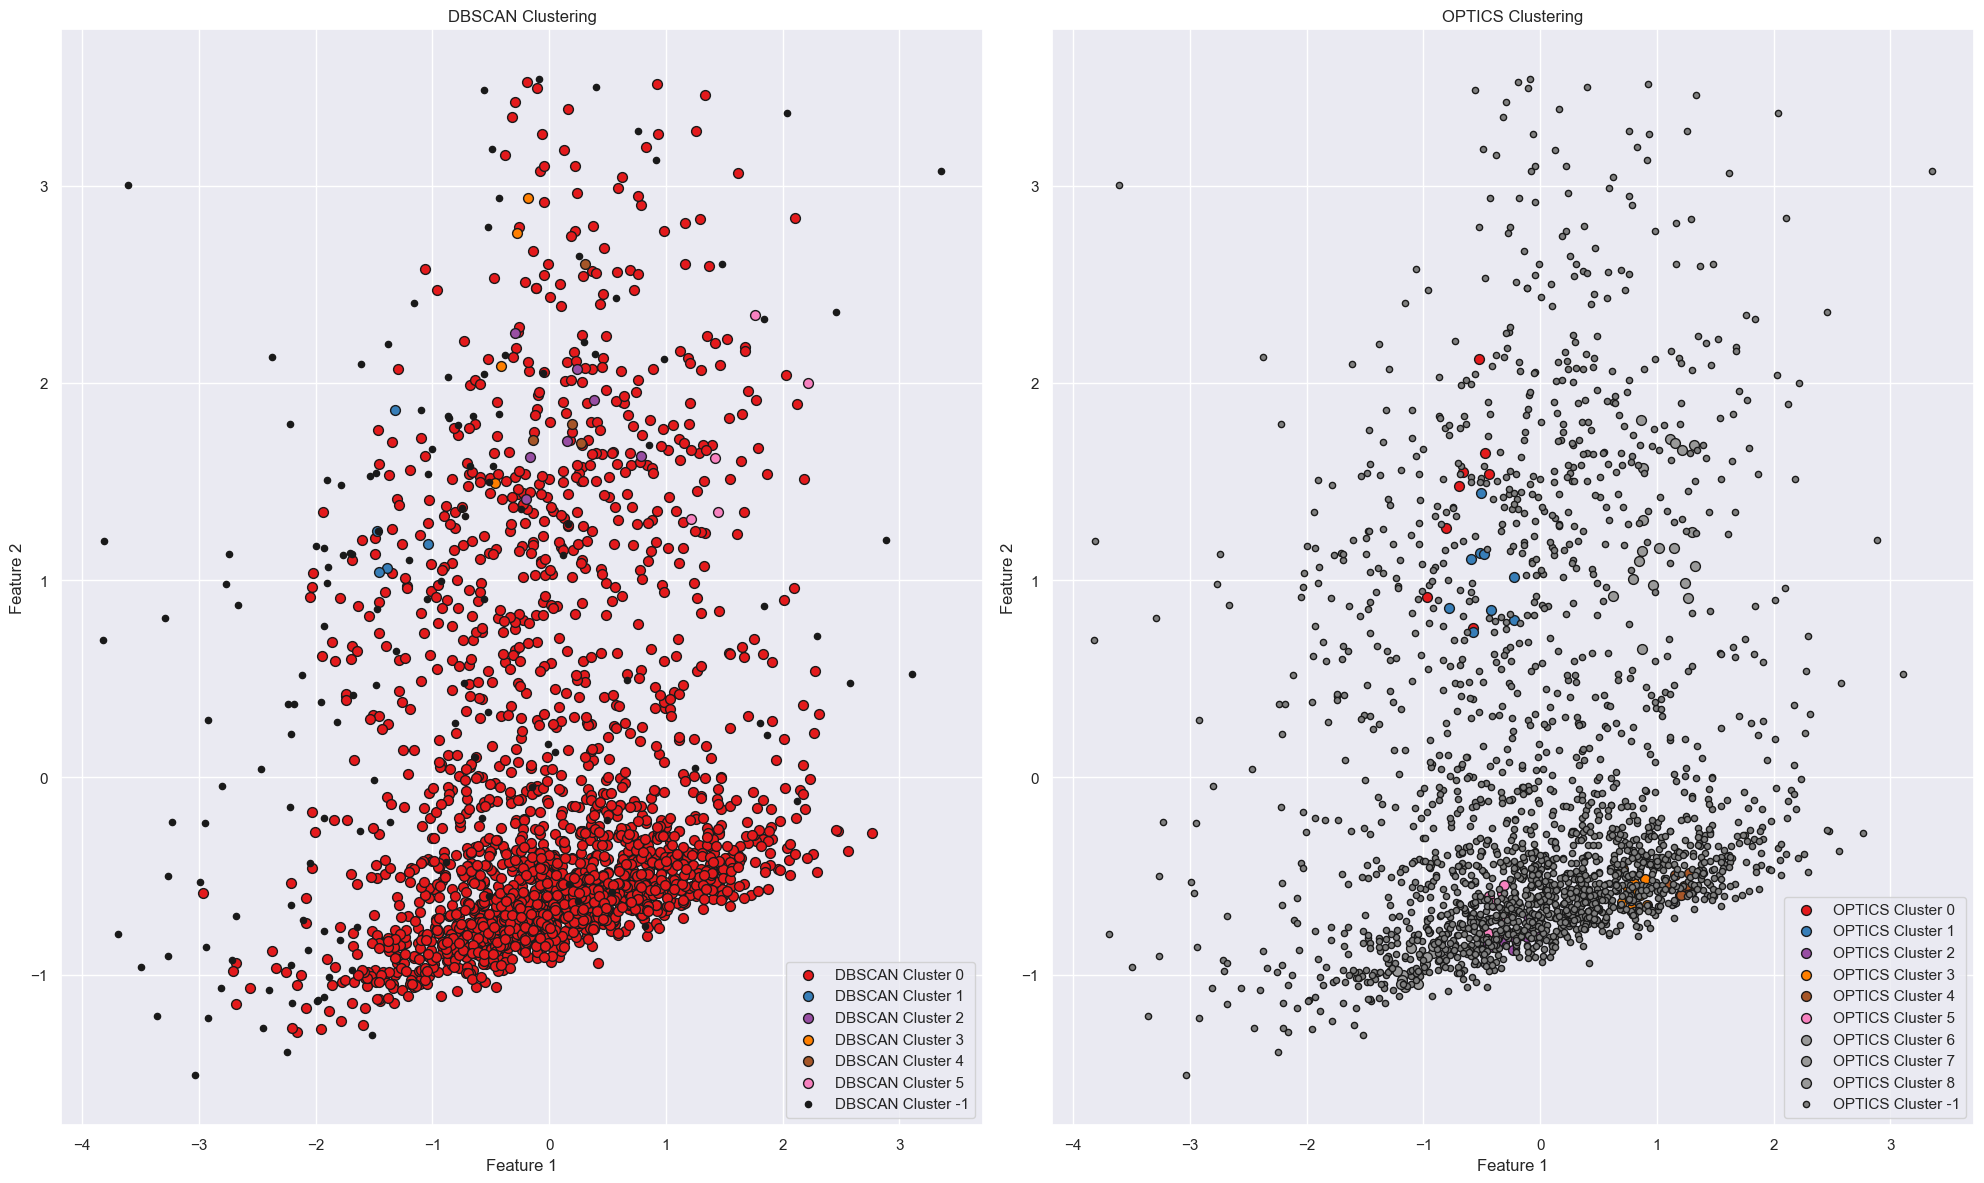

In [ ]:


# Предполагается, что scaled_df уже определен и содержит стандартизированные данные

# Запишем оптимальные значения из предыдущего пункта
dbscan_eps = 1.5
dbscan_min_samples = 4 

# Для удобства выведем значения для Optics
optics_eps = 1.2
optics_min_samples = 8

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
dbscan_labels = dbscan.fit_predict(scaled_df)  # Получаем метки на данных до уменьшенной размерности

# Получение количества кластеров и количества шумовых точек
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # -1 - это шум
n_noise_dbscan = list(dbscan_labels).count(-1)

# Процент наблюдений, которые не удалось кластеризовать
percentage_noise_dbscan = n_noise_dbscan / len(dbscan_labels) * 100

# Кластеризация OPTICS
optics = OPTICS(max_eps=optics_eps, min_samples=optics_min_samples)
optics_labels = optics.fit_predict(scaled_df)

# Получение количества кластеров и количества шумовых точек для OPTICS
n_clusters_optics = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)  # -1 - это шум
n_noise_optics = list(optics_labels).count(-1)

# Процент наблюдений, которые не удалось кластеризовать
percentage_noise_optics = n_noise_optics / len(optics_labels) * 100

# Визуализация кластеров
fig, axs = plt.subplots(1, 2, figsize=(20, 12))  # Создание двух подграфиков

# Визуализация DBSCAN
unique_labels_dbscan = set(dbscan_labels)
colors = plt.cm.get_cmap('Set1', len(unique_labels_dbscan))

for label in unique_labels_dbscan:
    if label == -1:
        color = 'k'  # Черный цвет для шумовых точек
        size = 20  # Размер для шумовых точек
    else:
        color = colors(label)
        size = 50  # Размер для кластерных точек
    
    # Выбор точек для текущего кластера
    cluster_points_dbscan = scaled_df[dbscan_labels == label]  # На пониженной размерности
    axs[0].scatter(cluster_points_dbscan.iloc[:, 0], cluster_points_dbscan.iloc[:, 1], color=color, label=f'DBSCAN Cluster {label}', edgecolor='k', s=size)

axs[0].set_title('DBSCAN Clustering')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].legend()
axs[0].grid(color='white')

# Визуализация OPTICS
unique_labels_optics = set(optics_labels)

for label in unique_labels_optics:
    if label == -1:
        color = 'gray'  # Серый цвет для шумовых точек
        size = 20  # Размер для шумовых точек
    else:
        color = colors(label)  # Используем те же цвета для кластеров
        size = 50  # Размер для кластерных точек
    
    # Выбор точек для текущего кластера
    cluster_points_optics = scaled_df[optics_labels == label]  # На пониженной размерности
    axs[1].scatter(cluster_points_optics.iloc[:, 0], cluster_points_optics.iloc[:, 1], color=color, marker='o', label=f'OPTICS Cluster {label}', edgecolor='k', s=size)

axs[1].set_title('OPTICS Clustering')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].legend()
axs[1].grid(color='white')

# Вывод информации о кластерах
print(f"DBSCAN - Количество кластеров: {n_clusters_dbscan}, Процент не кластеризованных: {percentage_noise_dbscan:.2f}%")
print(f"OPTICS - Количество кластеров: {n_clusters_optics}, Процент не кластеризованных: {percentage_noise_optics:.2f}%")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.metrics import adjusted_rand_score

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Определение диапазонов значений для max_eps и min_samples для OPTICS
max_eps_values = np.arange(0.1, 2.1, 0.1) 
min_samples_values = range(2, 21)

# Список для хранения подходящих комбинаций параметров
similar_params = []

for max_eps in max_eps_values:
    for min_samples in min_samples_values:
        # Кластеризация OPTICS
        optics = OPTICS(max_eps=max_eps, min_samples=min_samples)
        optics_labels = optics.fit_predict(scaled_df)

        # Сравнение результатов с DBSCAN
        if len(set(optics_labels)) > 1:  # Убедитесь, что есть более одного кластера
            score = adjusted_rand_score(dbscan_labels, optics_labels)
            if score > 0.5:  # Установите порог для схожести (можно настроить)
                similar_params.append((max_eps, min_samples, score))

# Вывод подходящих комбинаций параметров
print("Подходящие комбинации параметров для OPTICS (max_eps, min_samples, ARI):")
for max_eps, min_samples, score in similar_params:
    print(f"max_eps: {max_eps:.2f}, min_samples: {min_samples}, ARI: {score:.2f}")

C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_optics.py:661: UserWarning: All reachability values are inf. Set a larger max_eps or all data will be considered outliers.
  warnings.warn(
C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

KeyboardInterrupt: 